In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
def set_up_sketch_x_position() -> "ax2":
    """
    this method is used for sketching
    :return: it returns ax2
    """
    # xticks = np.arange(0, 60, 5)
    fig, ax2 = plt.subplots(figsize=(10, 10))
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
    ax2.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
    ax2.spines["bottom"].set_color("red")
    ax2.spines["left"].set_color("red")
    # ax2.set_xticks(xticks)
    ax2.set_xlabel("Position(m)", color="red")
    ax2.set_xlabel("Position(m)", color="red")
    ax2.set_ylabel("Acceleration of the following vehicles(m/sec2)", color="red")
    ax2.grid("on", alpha=0.2)
    return ax2

The new Algorithm to derive CC7 from the trajectory file

In [3]:
# Change the path to the csv file here
vehicle_routes_cc0_scenario1 = pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 3.csv")
#change the vehicle type from number to name to have a better visualization
vehicle_routes_cc0_scenario1['VEHTYPE'].replace(to_replace=[100, 150, 200, 300],
                                                value=["Car", "Transporter", "HGV", "Bus"],
                                                inplace=True)
len(vehicle_routes_cc0_scenario1)
# show the unique cars
number_of_cars_cc0_scenario1 = vehicle_routes_cc0_scenario1["$VEHICLE:NO"].unique()
# total number of cars in the network in the scenario2
len(number_of_cars_cc0_scenario1)

4090

In [4]:
vehicle_routes_cc0_scenario1.head()

,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


In [5]:
# Cars on GothaerStreet N-SW part 1
all_cars = vehicle_routes_cc0_scenario1[(vehicle_routes_cc0_scenario1["LANE\\LINK\\NO"] == 10)]
car_number_of_following_cars = []
#run the simulation according to specific time
for time in range(50, 3000):
    # all_cars_on_link_10_cc0_scenario1 = vehicle_routes_cc0_scenario1[(vehicle_routes_cc0_scenario1["LANE\\LINK\\NO"] == 10) & (vehicle_routes_cc0_scenario1["SIMSEC"] == time)]
    all_cars_on_link_10_cc0_scenario1 = all_cars[(all_cars["SIMSEC"] == time)]
    #if there are no cars on the link, simply skip and go to next time
    if all_cars_on_link_10_cc0_scenario1.empty:
        continue

    # otherwise, get the following vehicles
    cars_cc0_scenario1 = all_cars_on_link_10_cc0_scenario1["$VEHICLE:NO"].unique()
    #if there are less than two cars, skip it and increment time
    if len(cars_cc0_scenario1) < 2:
        continue
    cars_on_the_link = {}
    for car_number in cars_cc0_scenario1:
        specific_car = all_cars_on_link_10_cc0_scenario1[
            all_cars_on_link_10_cc0_scenario1["$VEHICLE:NO"] == car_number]
        cars_on_the_link[car_number] = specific_car["POS"].iloc[0]
    # in descending order
    sorted_cars_on_the_link = sorted(cars_on_the_link.items(), key=lambda x: x[1], reverse=True)
    distances = []
    for i in range(0, len(sorted_cars_on_the_link) - 1):
        distances.append(sorted_cars_on_the_link[i][1] - 4.5 - sorted_cars_on_the_link[i + 1][1])

    for dis in distances:
        #id distance between two vehicles is less than the specified amount, consider them as following vehicles
        if dis < 15:
            index_of_distance = distances.index(dis)
            car_number_of_following_car = sorted_cars_on_the_link[index_of_distance + 1][0]
            car_number_of_following_cars.append(car_number_of_following_car)
            # print(car_number_of_following_car)
            # print(detected_car["ACCELERATION"].min())
set_of_following_cars = set(car_number_of_following_cars)
car_number_min_decceleration = {}
for car_number in set_of_following_cars:
    detected_car = vehicle_routes_cc0_scenario1[(vehicle_routes_cc0_scenario1["LANE\\LINK\\NO"] == 10) & (
                vehicle_routes_cc0_scenario1["$VEHICLE:NO"] == car_number)]
    car_number_min_decceleration[car_number] = detected_car["ACCELERATION"].min()
#store the acceleration of vehicles
accelerations = []
for (name, value) in car_number_min_decceleration.items():
    print(f"vehicle_number: {name}, maximum deceleration: {value} ")
    accelerations.append(value)
frequency_of_acceleration = list(Counter(accelerations).items())
frequency_of_acceleration.sort(key=lambda t:t[1],reverse = True)
#see the frequency of accelerations
print(frequency_of_acceleration)
print(f"The value of CC7 is {frequency_of_acceleration[0][0]} m/sec2")
  




vehicle_number: 143, maximum deceleration: -0.25 
vehicle_number: 147, maximum deceleration: -0.33 
vehicle_number: 1429, maximum deceleration: -0.26 
vehicle_number: 664, maximum deceleration: -0.67 
vehicle_number: 1816, maximum deceleration: -0.25 
vehicle_number: 154, maximum deceleration: -0.48 
vehicle_number: 926, maximum deceleration: -0.25 
vehicle_number: 928, maximum deceleration: -0.47 
vehicle_number: 1824, maximum deceleration: -0.73 
vehicle_number: 1444, maximum deceleration: -0.39 
vehicle_number: 1585, maximum deceleration: -0.25 
vehicle_number: 1586, maximum deceleration: -0.37 
vehicle_number: 439, maximum deceleration: -0.37 
vehicle_number: 1596, maximum deceleration: -0.28 
vehicle_number: 702, maximum deceleration: -0.58 
vehicle_number: 320, maximum deceleration: -0.05 
vehicle_number: 199, maximum deceleration: -0.25 
vehicle_number: 228, maximum deceleration: -0.95 
vehicle_number: 488, maximum deceleration: -0.07 
vehicle_number: 499, maximum deceleration: 

Visualization of the acceleration




Text(0.5, 1.0, 'Acceleration of the following vehicles from 50 to 3000 seconds on the Gothaer Straße with the CC7 of 3')

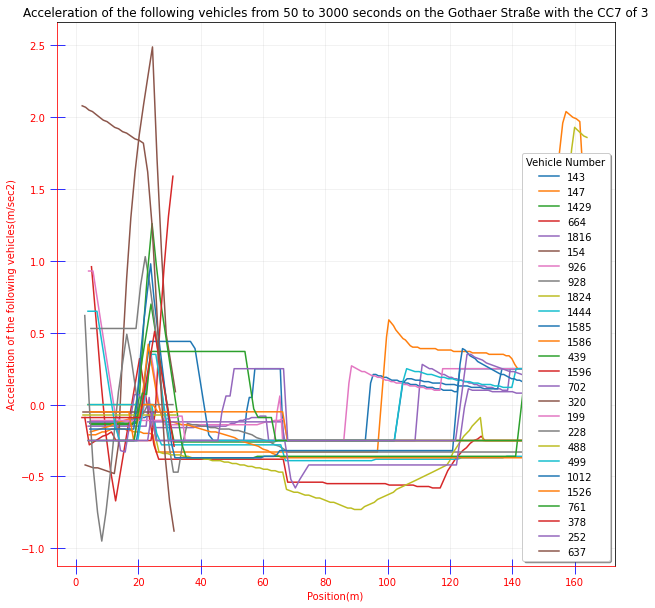

In [6]:
#plot the acc for only one car
ax2 = set_up_sketch_x_position()
for car in car_number_min_decceleration.keys():
    detected_car = vehicle_routes_cc0_scenario1[
    (vehicle_routes_cc0_scenario1["LANE\\LINK\\NO"] == 10) & (vehicle_routes_cc0_scenario1["$VEHICLE:NO"] == car)]
    ax2.plot(detected_car["POS"], detected_car["ACCELERATION"], label=car)
ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number")
ax2.set_title("Acceleration of the following vehicles from 50 to 3000 seconds on the Gothaer Straße with the CC7 of 3")
# plt.savefig("data/CC7/Acceleration of the following vehicles with the CC7 of 3")